<a href="https://colab.research.google.com/github/dasmadhuchhanda46/McDonald-s-Market-Segmentation/blob/main/market_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Market Segmentation Analysis

McDonald's (Fast Food ) Case Study

By Madhuchchhanda Das

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('mcdonalds_data.csv')

In [ ]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [ ]:
df.describe()

,Age
count,1453.000000
mean,44.604955
std,14.221178
min,18.000000
25%,33.000000
50%,45.000000
75%,57.000000
max,71.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [ ]:
df.isnull().sum()

,0
yummy,0
convenient,0
spicy,0
fattening,0
greasy,0
fast,0
cheap,0
tasty,0
expensive,0
healthy,0


In [ ]:
df.dtypes

,0
yummy,object
convenient,object
spicy,object
fattening,object
greasy,object
fast,object
cheap,object
tasty,object
expensive,object
healthy,object


In [ ]:
#Checking for the count of below variables
df['Gender'].value_counts()

,count
Gender,
Female,788
Male,665


In [ ]:
df['VisitFrequency'].value_counts()

,count
VisitFrequency,
Once a month,439
Every three months,342
Once a year,252
Once a week,235
Never,131
More than once a week,54


In [ ]:
df['Like'].value_counts()

,count
Like,
+3,229
+2,187
0,169
+4,160
+1,152
I hate it!-5,152
I love it!+5,143
-3,73
-4,71


In [ ]:
MD_x = (df.iloc[:, :11] == "Yes").astype(int)
col_means = np.round(MD_x.mean(), 2)
print(col_means)

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


In [ ]:
cat = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting']

In [ ]:
#Considering only first 11 attributes
MD_x = df.loc[:,cat]
MD_x

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No


# 4. Exploring Data

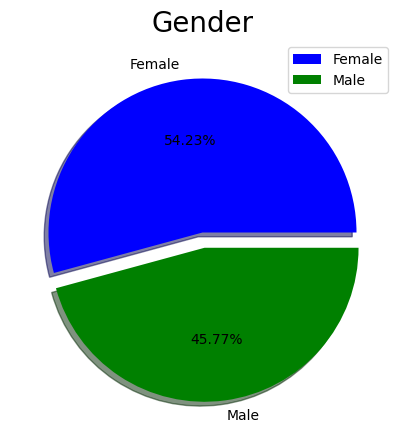

<ipython-input-51-dc69190f4432>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  f = sns.countplot(x=df['Age'],palette = 'hsv')


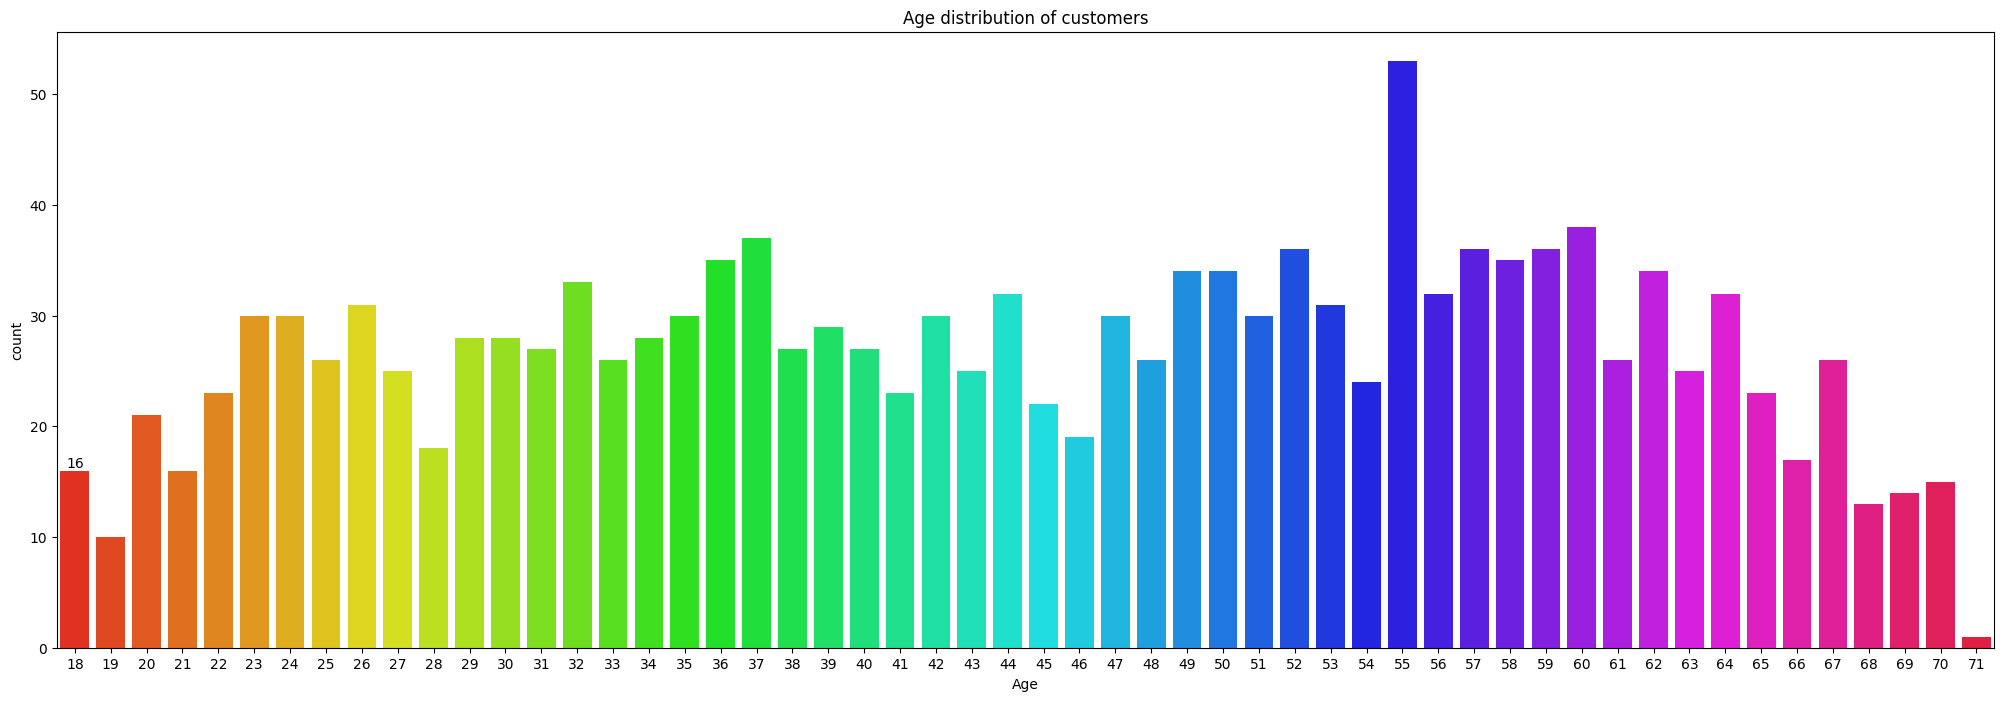

In [ ]:
#Customer segmentation - based on socio-demographs (Age & Gender)

#Gender
labels = ['Female', 'Male']
size = df['Gender'].value_counts()
colors = ['blue', 'green']
explode = [0, 0.1]
plt.rcParams['figure.figsize'] = (6, 5)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()
#we infer that there are more female customers than male.

#Age
plt.rcParams['figure.figsize'] = (25, 8)
f = sns.countplot(x=df['Age'],palette = 'hsv')
f.bar_label(f.containers[0])
plt.title('Age distribution of customers')
plt.show()
# Mcdonalds recieve more customers of age between 50-60 and 35-40.

<ipython-input-52-c687d3b2f879>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x="Like", y="Age",data=df,


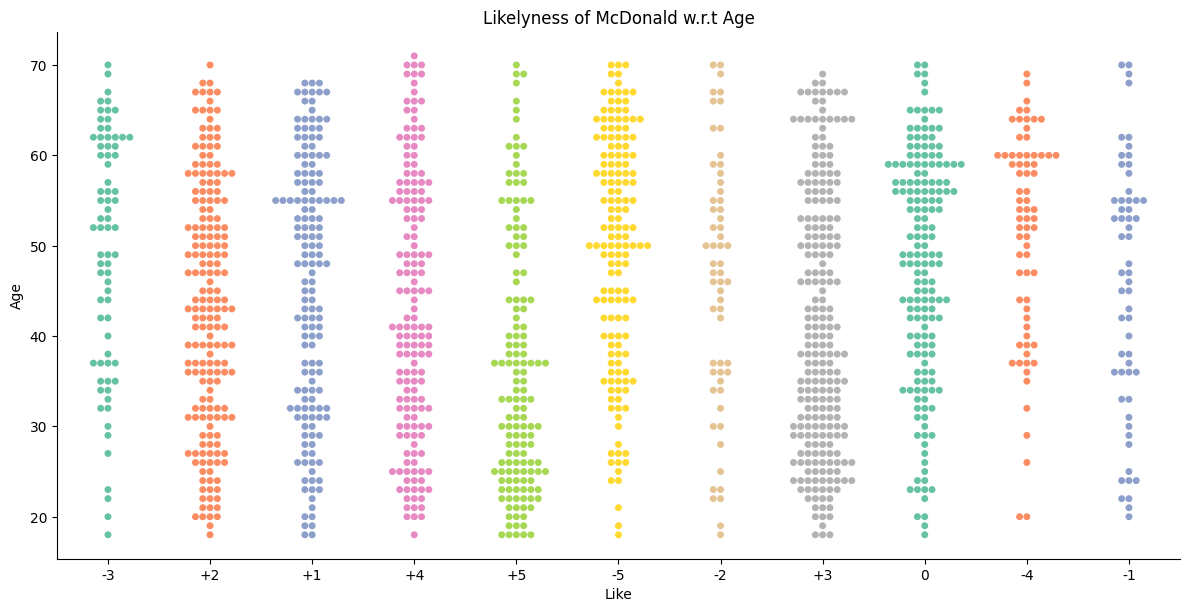

In [ ]:
#Customer segmentation - based on pyschographic segmentation

#For convinence renaming the category
df['Like']= df['Like'].replace({'I hate it!-5': '-5','I love it!+5':'+5'})
#Like
sns.catplot(x="Like", y="Age",data=df,
            orient="v", height= 6, aspect= 2, palette="Set2",kind="swarm")
plt.title('Likelyness of McDonald w.r.t Age')
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder instance
le = LabelEncoder()

# Apply label encoding to the selected columns
cat_cols = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
            'tasty', 'expensive', 'healthy', 'disgusting']

# Encoding each categorical column
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

# Display the updated DataFrame
df.head()


,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male


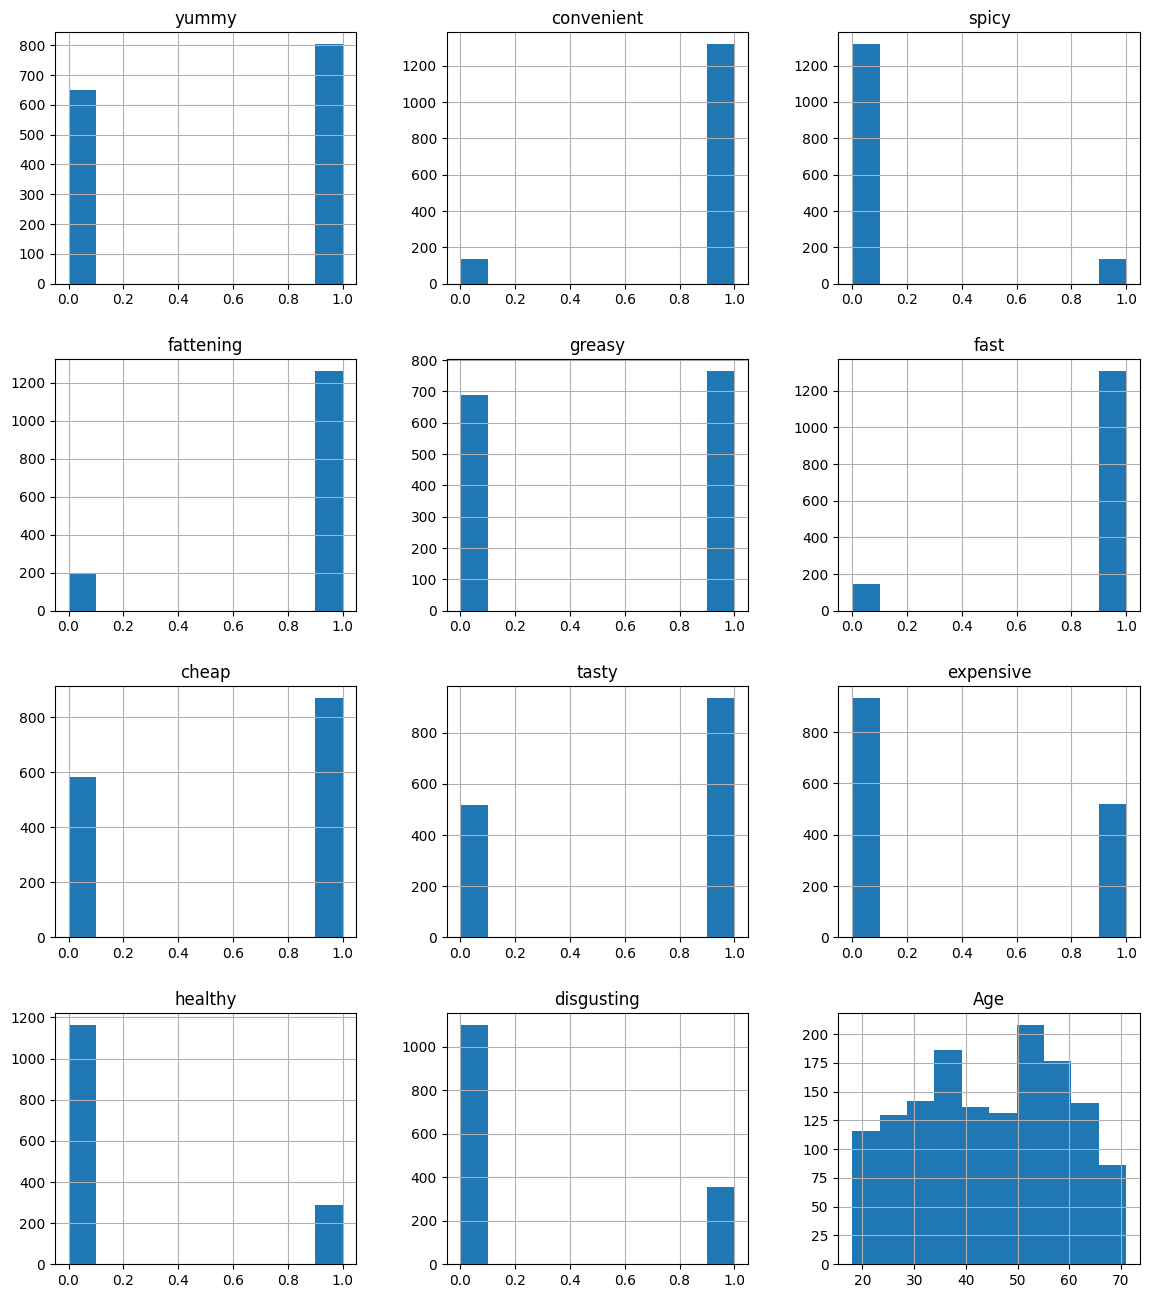

In [ ]:
#Histogram of the each attributes
plt.rcParams['figure.figsize'] = (14,16)
df.hist()
plt.show()


In [ ]:
MD_x = MD_x.applymap(lambda x: 1 if x == "Yes" else 0)

<ipython-input-55-3d333cacb989>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  MD_x = MD_x.applymap(lambda x: 1 if x == "Yes" else 0)


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


x = df[cat]

# Standardizing the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(x)

# Applying PCA
pca_model = PCA(n_components=11)
pca_result = pca_model.fit_transform(scaled_data)

# Create a DataFrame for the principal components
pca_columns = [f'PC{i+1}' for i in range(11)]
pca_df = pd.DataFrame(pca_result, columns=pca_columns)

# Display the PCA-transformed data
pca_df.head()


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,-0.704334,0.437016,-0.268698,-0.872074,1.521184,-0.470160,0.030969,0.687116,-0.367598,-0.321161,1.701170
1,0.467820,-0.364277,1.596835,-0.004835,-0.462385,0.449321,-0.087351,-0.446003,-0.221855,-0.191268,1.467681
2,-0.191986,-1.712949,0.339413,3.368168,1.266802,-0.148058,0.606634,0.668576,-1.377226,1.259300,-0.128530
3,0.116991,1.155122,1.003913,0.469589,-1.141750,0.857182,-0.015843,-0.390275,1.578539,-0.092189,-0.233201
4,0.034724,1.390267,-0.792275,0.473031,0.270488,0.847963,1.804085,0.700019,-1.630339,-0.092449,-0.033144


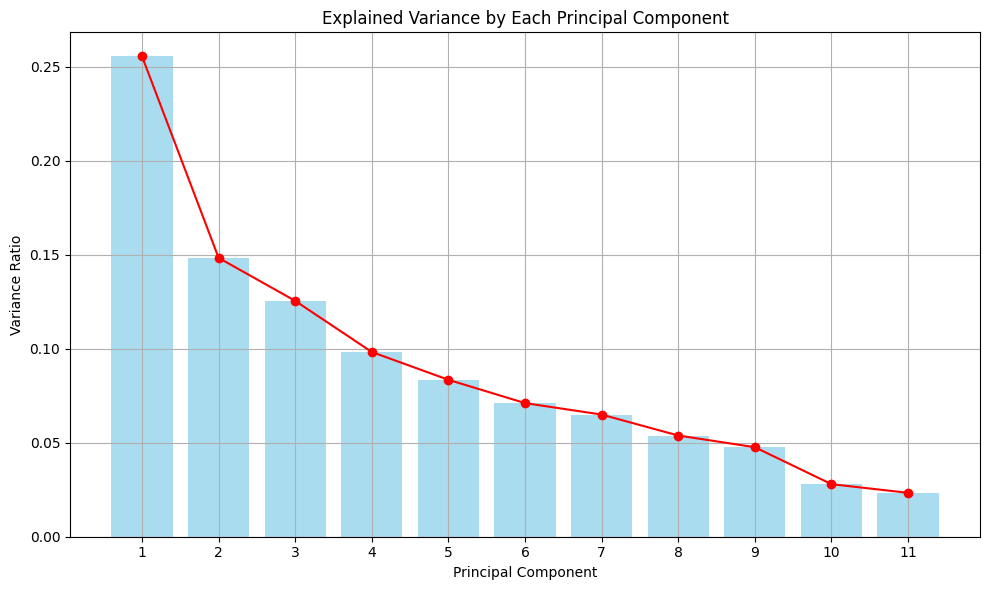

In [ ]:
# Plotting explained variance ratio
plt.figure(figsize=(10, 6))
plt.bar(range(1, 12), pca_model.explained_variance_ratio_, alpha=0.7, color='skyblue')
plt.plot(range(1, 12), pca_model.explained_variance_ratio_, marker='o', color='red')
plt.title('Explained Variance by Each Principal Component')
plt.xlabel('Principal Component')
plt.ylabel('Variance Ratio')
plt.xticks(range(1, 12))
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
#Considering only the 11 cols and converting it into array
x = df.loc[:,cat].values
x

array([[0, 1, 0, ..., 1, 0, 0],
       [1, 1, 0, ..., 1, 0, 0],
       [0, 1, 1, ..., 1, 1, 0],
       ...,
       [1, 1, 0, ..., 1, 0, 0],
       [1, 1, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 1, 0, 1]])

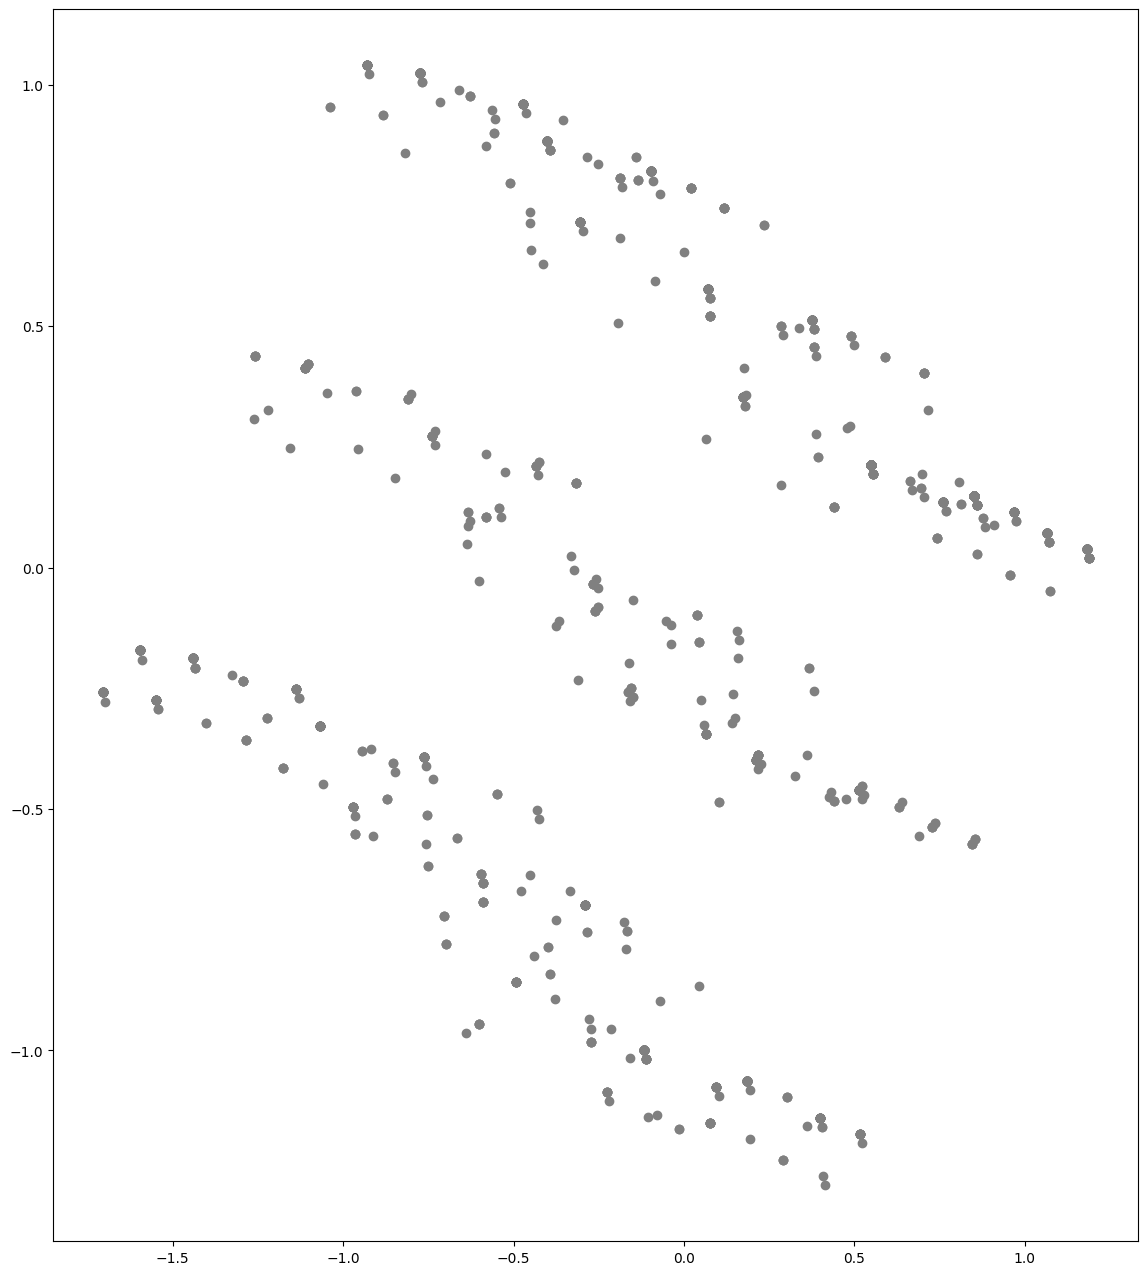

In [ ]:
#plot PCA scores
plt.scatter(pca_model.fit_transform(MD_x)[:, 0], pca_model.transform(MD_x)[:, 1], color="grey")

In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

# Assuming MD_x is already defined (binary matrix with 1s and 0s)
pca = PCA()
pca.fit(MD_x)

# Calculate required values
std_dev = np.sqrt(pca.explained_variance_)
prop_var = pca.explained_variance_ratio_
cum_var = np.cumsum(prop_var)

# Round values to 5 decimal places for matching R-style
std_dev = np.round(std_dev, 5)
prop_var = np.round(prop_var, 5)
cum_var = np.round(cum_var, 5)

# Print in R-style format
print("Importance of components:\n")
for i in range(0, 11, 5):
    pcs = [f"PC{j+1}" for j in range(i, min(i+5, 11))]
    print("       " + " ".join(pcs))

    row1 = "Standard deviation   " + " ".join(f"{x:<7}" for x in std_dev[i:i+5])
    row2 = "Proportion of Variance " + " ".join(f"{x:<7}" for x in prop_var[i:i+5])
    row3 = "Cumulative Proportion  " + " ".join(f"{x:<7}" for x in cum_var[i:i+5])

    print(row1)
    print(row2)
    print(row3)
    print()


Importance of components:

       PC1 PC2 PC3 PC4 PC5
Standard deviation   0.75705 0.60746 0.50462 0.3988  0.33741
Proportion of Variance 0.29945 0.1928  0.13305 0.0831  0.05948
Cumulative Proportion  0.29945 0.49224 0.62529 0.70839 0.76787

       PC6 PC7 PC8 PC9 PC10
Standard deviation   0.31027 0.2897  0.27512 0.26525 0.24884
Proportion of Variance 0.0503  0.04385 0.03955 0.03676 0.03235
Cumulative Proportion  0.81817 0.86201 0.90156 0.93832 0.97068

       PC11
Standard deviation   0.2369 
Proportion of Variance 0.02932
Cumulative Proportion  1.0    



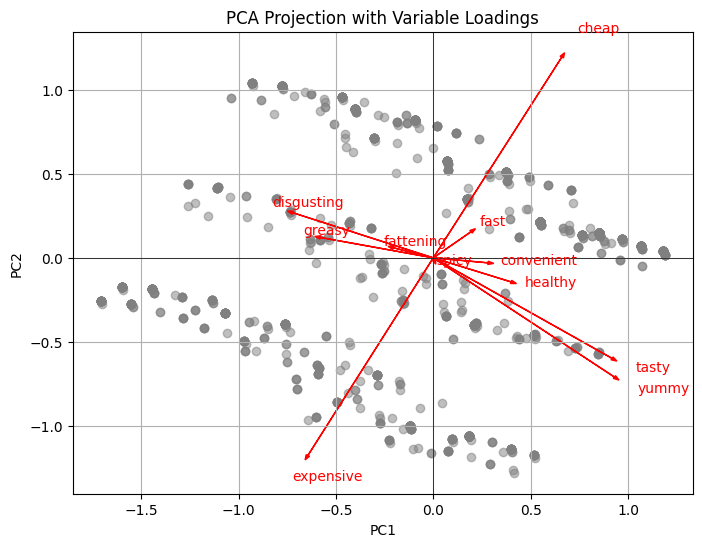

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Fit PCA on MD_x (binary 0/1 data)
pca = PCA(n_components=2)
components = pca.fit_transform(MD_x)

# Loadings (how original variables influence each component)
loadings = pca.components_.T  # shape (features, components)

# Plot the projected data
plt.figure(figsize=(8, 6))
plt.scatter(components[:, 0], components[:, 1], color='grey', alpha=0.5)

# Add arrows for original variables (segmentation variables)
for i, var in enumerate(MD_x.columns):
    plt.arrow(0, 0, loadings[i, 0]*2, loadings[i, 1]*2,
              color='red', head_width=0.02, length_includes_head=True)
    plt.text(loadings[i, 0]*2.2, loadings[i, 1]*2.2, var, color='red')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Projection with Variable Loadings')
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.show()


# 5. Extracting Segments

In [ ]:
#Considering only first 11 attributes
MD_x = df.loc[:,cat]
MD_x

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1
1449,1,1,0,1,0,0,1,1,0,1,0
1450,1,1,0,1,0,1,0,1,1,0,0
1451,1,1,0,0,0,1,1,1,0,1,0


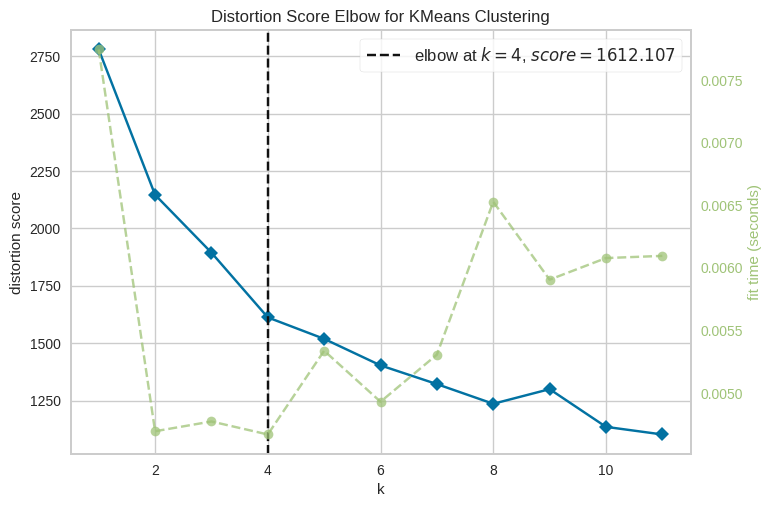

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
#Extracting segments

#Using k-means clustering analysis
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12)).fit(MD_x)
visualizer.show()

In [ ]:
#K-means clustering

kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(MD_x)
df['cluster_num'] = kmeans.labels_ #adding to df
print (kmeans.labels_) #Label assigned for each data point
print (kmeans.inertia_) #gives within-cluster sum of squares.
print(kmeans.n_iter_) #number of iterations that k-means algorithm runs to get a minimum within-cluster sum of squares
print(kmeans.cluster_centers_) #Location of the centroids on each cluster.

[0 3 1 ... 1 3 1]
1748.968752115803
9
[[ 2.70270270e-02  8.47972973e-01  6.08108108e-02  9.05405405e-01
   6.11486486e-01  9.29054054e-01  8.41216216e-01 -1.44328993e-15
   5.40540541e-02  8.10810811e-02  4.45945946e-01]
 [ 5.11627907e-01  8.43551797e-01  9.30232558e-02  9.06976744e-01
   6.19450317e-01  8.01268499e-01  2.11416490e-02  5.60253700e-01
   9.83086681e-01  1.33192389e-01  3.46723044e-01]
 [ 1.44328993e-15  9.61832061e-01  1.37404580e-01  8.70229008e-01
   5.19083969e-01  9.38931298e-01  8.39694656e-01  1.00000000e+00
   5.34351145e-02  1.45038168e-01  1.75572519e-01]
 [ 1.00000000e+00  9.81916817e-01  1.01265823e-01  8.11934901e-01
   4.03254973e-01  9.60216998e-01  9.05967450e-01  9.76491863e-01
   5.78661844e-02  3.30922242e-01  6.14828210e-02]]


In [ ]:
#To see each cluster size
from collections import Counter
Counter(kmeans.labels_)

Counter({np.int32(0): 296,
         np.int32(3): 553,
         np.int32(1): 473,
         np.int32(2): 131})

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import numpy as np
import matplotlib.pyplot as plt

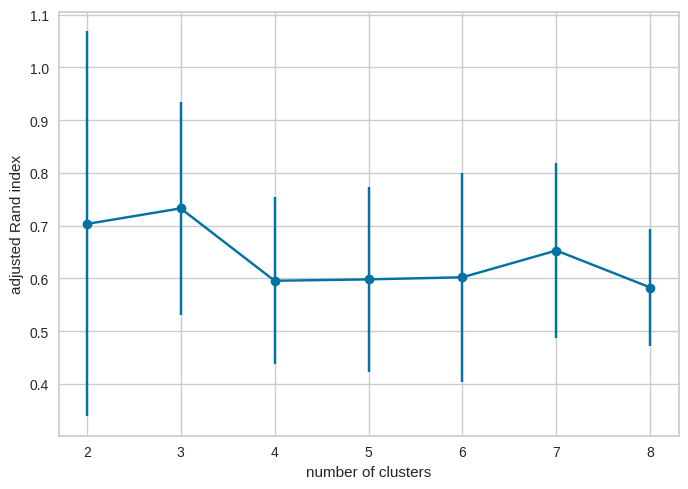

In [ ]:
# set the random seed
np.random.seed(1234)

# perform K-means clustering with 2 to 8 clusters and 10 repetitions
n_clusters = range(2, 9)
n_reps = 10
scores = []
for k in n_clusters:
    km = KMeans(n_clusters=k, max_iter=300, n_init=n_reps).fit(MD_x)
    km_labels = km.labels_
    score_k = []
    for i in range(n_reps):
        km_rep = KMeans(n_clusters=k, max_iter=300, n_init=1).fit(MD_x)
        km_rep_labels = km_rep.labels_
        score_k.append(adjusted_rand_score(km_labels, km_rep_labels))
    scores.append(score_k)

# plot the adjusted Rand index scores for each number of clusters
plt.errorbar(n_clusters, np.mean(scores, axis=1), yerr=np.std(scores, axis=1), fmt="o-")
plt.xlabel("number of clusters")
plt.ylabel("adjusted Rand index")
plt.show()

In [ ]:
# count the frequency of each value in the "Like" column
like_counts = df["Like"].value_counts()

# reverse the order of the resulting Series
like_counts = like_counts.iloc[::-1]

# print the results
print(like_counts)

Like
-1     58
-2     59
-4     71
-3     73
+5    143
-5    152
+1    152
+4    160
0     169
+2    187
+3    229
Name: count, dtype: int64


In [ ]:
# convert the "Like" column to numeric and subtract from 6 to create a new column
df["Like.n"] = 6 - pd.to_numeric(df["Like"], errors="coerce")

# count the frequency of each value in the "Like.n" column
like_n_counts = df["Like.n"].value_counts()

# print the results
print(like_n_counts)



Like.n
3     229
4     187
6     169
2     160
5     152
11    152
1     143
9      73
10     71
8      59
7      58
Name: count, dtype: int64


## 6. Profiling Segments

In [ ]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
# compute the pairwise distances between the columns of MD_x
D = np.transpose(MD_x)
D = linkage(D, method = "average")

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [45.0, 45.0, 55.0, 55.0],
  [35.0, 35.0, 50.0, 50.0],
  [25.0, 25.0, 42.5, 42.5],
  [10.0, 10.0, 33.75, 33.75],
  [95.0, 95.0, 105.0, 105.0],
  [85.0, 85.0, 100.0, 100.0],
  [75.0, 75.0, 92.5, 92.5],
  [65.0, 65.0, 83.75, 83.75],
  [21.875, 21.875, 74.375, 74.375]],
 'dcoord': [[0.0,
   np.float64(15.132745950421556),
   np.float64(15.132745950421556),
   0.0],
  [0.0, np.float64(13.820274961085254), np.float64(13.820274961085254), 0.0],
  [0.0,
   np.float64(16.837294569763987),
   np.float64(16.837294569763987),
   np.float64(13.820274961085254)],
  [0.0,
   np.float64(23.67244402390833),
   np.float64(23.67244402390833),
   np.float64(16.837294569763987)],
  [np.float64(15.132745950421556),
   np.float64(24.097479054882314),
   np.float64(24.097479054882314),
   np.float64(23.67244402390833)],
  [0.0, np.float64(18.303005217723125), np.float64(18.303005217723125), 0.0],
  [0.0,
   np.float64(22.260923119338788),
   np.float64(22.260923119338788)

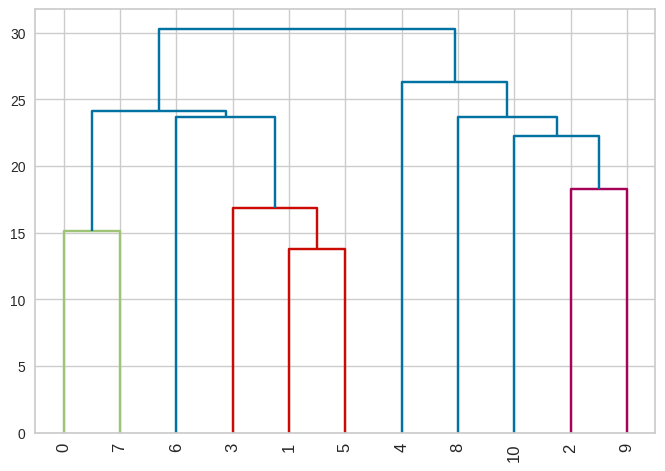

In [ ]:
# plot the dendrogram
dendrogram(D, truncate_mode = "lastp", p = 12, leaf_rotation = 90,
           leaf_font_size = 12, show_contracted = True)

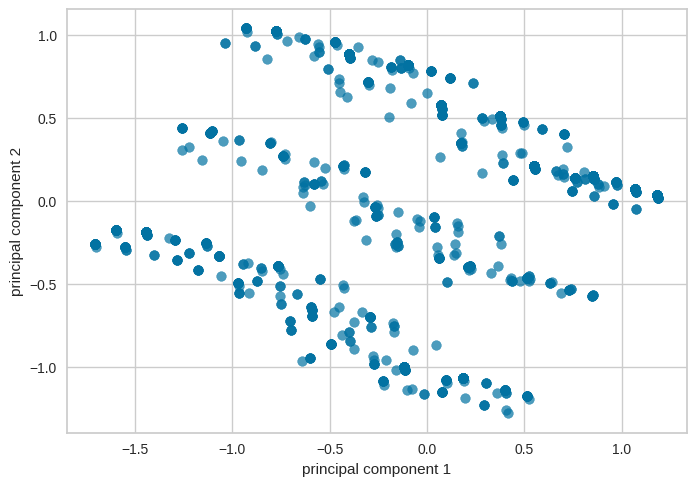

In [ ]:
import matplotlib.pyplot as plt

# get the coordinates of the data projected onto the first two principal components
proj_data = pca.fit_transform(x)[:, :2]

# plot the scatter plot
plt.scatter(proj_data[:, 0], proj_data[:, 1], alpha=0.7)
plt.xlabel("principal component 1")
plt.ylabel("principal component 2")
plt.show()


## 7. Describing Segment

In [ ]:
#DESCRIBING SEGMENTS

from statsmodels.graphics.mosaicplot import mosaic
from itertools import product

crosstab =pd.crosstab(df['cluster_num'],df['Like'])
crosstab

Like,+1,+2,+3,+4,+5,-1,-2,-3,-4,-5,0
cluster_num,,,,,,,,,,,
0,19,27,12,1,0,22,27,36,37,71,44
1,47,56,66,40,34,16,22,30,26,73,63
2,34,20,10,4,0,11,5,7,5,6,29
3,52,84,141,115,109,9,5,0,3,2,33


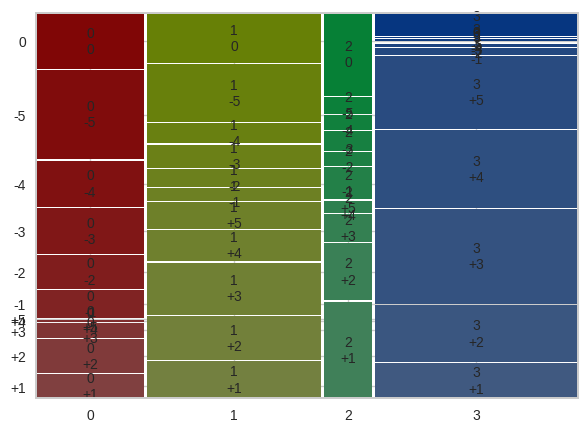

In [ ]:
#MOSAIC PLOT
plt.rcParams['figure.figsize'] = (7,5)
mosaic(crosstab.stack())
plt.show()

In [ ]:
#Mosaic plot gender vs segment
crosstab_gender =pd.crosstab(df['cluster_num'],df['Gender'])
crosstab_gender

Gender,Female,Male
cluster_num,,
0,168,128
1,214,259
2,75,56
3,331,222


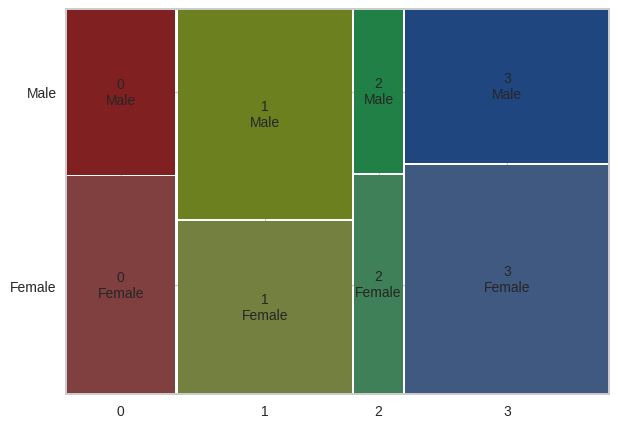

In [ ]:
plt.rcParams['figure.figsize'] = (7,5)
mosaic(crosstab_gender.stack())
plt.show()

## 8. Selecting Target Segment

In [ ]:
#Calculating the mean
#Visit frequency
df['VisitFrequency'] = LabelEncoder().fit_transform(df['VisitFrequency'])
visit = df.groupby('cluster_num')['VisitFrequency'].mean()
visit = visit.to_frame().reset_index()
visit

,cluster_num,VisitFrequency
0,0,2.787162
1,1,2.596195
2,2,2.618321
3,3,2.598553


In [ ]:
#Like
df['Like'] = LabelEncoder().fit_transform(df['Like'])
Like = df.groupby('cluster_num')['Like'].mean()
Like = Like.to_frame().reset_index()
Like

,cluster_num,Like
0,0,6.597973
1,1,4.991543
2,2,4.351145
3,3,2.882459


In [ ]:
#Gender
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])
Gender = df.groupby('cluster_num')['Gender'].mean()
Gender = Gender.to_frame().reset_index()
Gender

,cluster_num,Gender
0,0,0.432432
1,1,0.547569
2,2,0.427481
3,3,0.401447


In [ ]:
segment = Gender.merge(Like, on='cluster_num', how='left').merge(visit, on='cluster_num', how='left')
segment

,cluster_num,Gender,Like,VisitFrequency
0,0,0.432432,6.597973,2.787162
1,1,0.547569,4.991543,2.596195
2,2,0.427481,4.351145,2.618321
3,3,0.401447,2.882459,2.598553


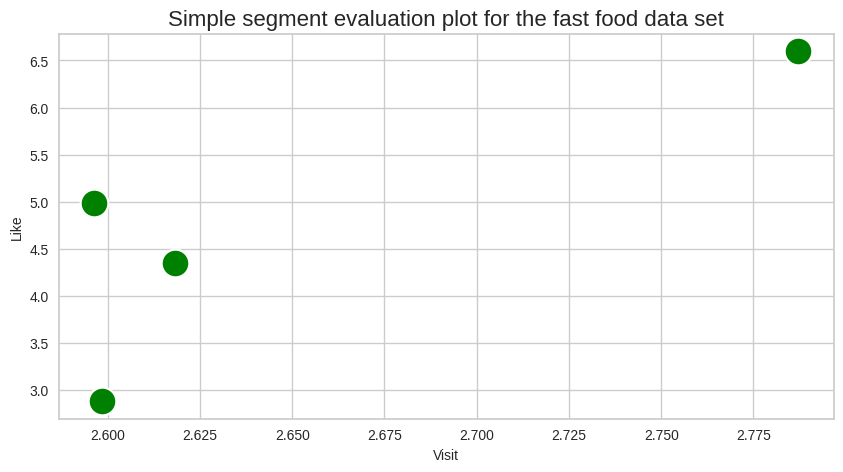

In [ ]:
#Target segments

plt.figure(figsize = (10,5))
sns.scatterplot(x = "VisitFrequency", y = "Like",data=segment,s=400, color="green")
plt.title("Simple segment evaluation plot for the fast food data set",
          fontsize = 16)
plt.xlabel("Visit", fontsize = 10)
plt.ylabel("Like", fontsize = 10)
plt.show()

## 9. Customising the Marketing Mix

When designing the marketing mix, McDonald’s might choose to target Segment 3—young customers who enjoy the brand and find the food delicious, but consider it relatively expensive. To appeal to this group, the company could introduce a MCSUPERBUDGET line, aligning with the Price component of the 4Ps. This strategy could help attract budget-conscious consumers while fostering brand loyalty. As these customers grow older and increase their earning power, their sensitivity to price may diminish, making them more likely to transition to McDonald’s regular product offerings over time.



## 10. Evaluation and Monitoring

Once the market segmentation analysis is complete and all strategic and tactical marketing initiatives have been implemented, it is essential to continuously evaluate the effectiveness of the segmentation strategy. Ongoing monitoring of the market is crucial, as both internal and external factors can evolve over time. For instance, members of Segment 3 may begin to earn higher incomes, making the MCSUPERBUDGET line less relevant to their needs. Additionally, shifts can occur within the existing segments or the broader market environment—such as the entry of new competitors. To remain competitive and responsive, McDonald’s must consistently track these potential changes and be prepared to adjust its marketing strategies accordingly.

